# Black Scholes Model 

In [1]:
from scipy import stats
from numpy import log, exp, sqrt 
# alias the normal distribution cdf  as N
N = stats.norm.cdf

## Lecture 1 - Black Scholes Equation

In [2]:
def call_option_price(S0, E, T, rf, sigma):
    # calculate parameters d1 and d2
    d1 = (log(S0/E) + (rf + sigma * sigma / 2.0) * T) / (sigma * sqrt(T))
    d2 = d1 - sigma * sqrt(T)
    # use standard normal dist N(x) to calculate price
    V = S0 * N(d1) - E * exp(-rf*T) * N(d2)
    return V

def put_option_price(S0, E, T, rf, sigma):
    # calculate parameters d1 and d2
    d1 = (log(S0/E) + (rf + sigma * sigma / 2.0) * T) / (sigma * sqrt(T))
    d2 = d1 - sigma * sqrt(T)
    # use standard normal dist N(x) to calculate price
    V = -S0 * N(-d1) + E * exp(-rf*T) * N(-d2)
    return V

We can verify the results at : [Black Scholes Calculator](https://goodcalculators.com/black-scholes-calculator/).

In [3]:
# underlying stock price at t=0
S0 = 110
# strike price
E = 100
# expiry 1year=365days
T = 1
# risk-free rate
rf = 0.05
# volatility of the underlying stock
sigma = 0.2

V_call = call_option_price(S0, E, T, rf, sigma)
print(f"Call option price according to Black-Scholes model: {V_call:.2f}")

V_put = put_option_price(S0, E, T, rf, sigma)
print(f"Put option price according to Black-Scholes model: {V_put:.2f}")

Call option price according to Black-Scholes model: 17.66
Put option price according to Black-Scholes model: 2.79


## Lecture 2 - Monte Carlo Simulation of Stock Prices

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
N_SIMULATIONS = 1000

def stock_price_monte_carlo(S0: float, mu: float, sigma: float, N: int=500):
    results = []
    for _ in range(N_SIMULATIONS):
        prices = [S0]
        for _ in range(N):
            # we simulate the day by day, i.e. no multiplicatio by t
            stock_price = prices[-1] * \
                np.exp((mu - 0.5 * sigma ** 2) + sigma * np.random.normal())
            prices.append(stock_price)
        results.append(prices)
    
    simulation_data = pd.DataFrame(results).T
    return simulation_data

In [6]:
# simulate data reproducably
np.random.seed(2020)
simulation_data = stock_price_monte_carlo(50, 0.0002, 0.01)
# get mean across all simulated days
expected_path = simulation_data.mean(axis=1)
simulation_data

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,...,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
1,49.130722,49.638927,50.337555,50.086140,50.027547,50.354706,50.494668,49.876039,49.654977,50.988747,...,50.514000,49.692004,49.253563,49.635888,50.174034,49.639876,49.822033,50.061009,49.906998,50.122379
2,49.175231,48.451300,50.944970,50.017814,49.740483,50.323570,51.444916,49.609366,50.409165,50.643006,...,51.173629,49.182451,49.046623,50.253015,50.287655,49.491581,49.683748,50.032591,49.968973,49.861271
3,48.629667,47.485513,49.921747,49.373112,50.262860,50.263137,50.855846,48.799193,51.111129,50.562572,...,51.581752,48.674329,48.547475,50.602042,50.591513,49.996731,48.612393,50.094334,49.718393,50.508301
4,48.321156,46.958813,49.545630,48.675825,50.962267,50.025427,50.507879,48.322173,51.171961,50.760205,...,52.199489,49.436719,48.117174,51.268747,50.377258,50.949908,48.012720,49.941941,49.862629,49.636216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,47.043012,45.334993,64.179153,47.201477,52.235370,63.891769,84.766811,56.631393,46.860718,53.486452,...,58.654315,65.370977,56.952680,36.550405,62.835587,36.393607,49.076438,76.001248,56.659802,66.316468
497,46.974602,45.348488,65.378557,47.648076,52.190585,64.203102,85.035945,56.966477,46.858096,53.216365,...,60.230974,65.872214,56.541570,36.702749,62.552403,35.975260,48.796037,75.949313,57.181490,65.219092
498,46.743143,45.165029,65.004105,47.472565,52.333139,63.467764,84.901225,57.269378,46.359754,52.882594,...,60.210086,66.469659,56.187664,36.757467,63.138861,36.482841,48.528326,76.305637,56.487919,65.830164
499,46.939053,45.244657,65.947879,47.087632,52.662260,64.380281,84.665827,57.189895,46.434800,53.229108,...,59.793221,66.115777,55.331977,36.937062,62.743958,36.171172,48.927322,75.314163,56.729934,66.026791


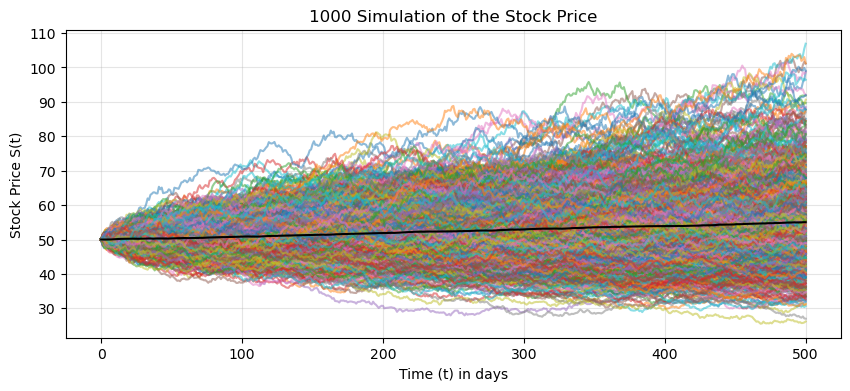

In [7]:
plt.figure(figsize=(10,4))
plt.plot(simulation_data, alpha=.5)
plt.plot(expected_path, color="k")
plt.grid(alpha=.33)
plt.title(f"{N_SIMULATIONS} Simulation of the Stock Price")
plt.xlabel("Time (t) in days")
plt.ylabel("Stock Price S(t)");

## Lecture 3 - Monte-Carlo Simulation with Black-Scholes Model

In [8]:
class OptionPricing:
    def __init__(self, S0, E, T, rf, sigma, iterations) -> None:
        self.S0 = S0
        self.E = E
        self.T = T
        self.rf = rf
        self.sigma = sigma
        self.iterations = iterations
        # we have 2 columns: 1st with 0s & 2nd with with pay-offs
        self.option_data = np.zeros([self.iterations, 2])

    def monte_carlo_simulation(self):
        # dimensions: 1 dimensional array with as many items as the itrations
        rand = np.random.normal(0, 1, [1, self.iterations])

        # equation for the S(t) stock price at T
        stock_price = self.S0*np.exp(
            self.T*(self.rf - 0.5*self.sigma**2)+self.sigma*np.sqrt(self.T)*rand
            )
        
        return stock_price

    def call_option_simulation(self):
        option_data = self.option_data
        stock_price = self.monte_carlo_simulation()

		# we need S-E because we want to calculate the max(S-E,0)
        option_data[:,1] = stock_price - self.E   
        
		#average for the Monte-Carlo method
		#np.amax() returns the max(0,S-E) according to the formula
        average = np.mean(np.amax(option_data, axis=1))
 
		#have to use the discount factor exp(-rT) 
        return np.exp(-1.0*self.rf*self.T)*average
    
    def put_option_simulation(self):
        option_data = self.option_data
        stock_price = self.monte_carlo_simulation()
 
		# we need S-E because we want to calculate the max(E-S,0)
        option_data[:,1] = self.E - stock_price   
        
		#average for the Monte-Carlo method
		#np.amax() returns the max(E-S,0) according to the formula
        average = np.mean(np.amax(option_data, axis=1))
 
		#have to use the discount factor exp(-rT) 
        return np.exp(-1.0*self.rf*self.T)*average


In [9]:
np.random.seed(2020)#seed for reproducibility
S0=110				#underlying stock price at t=0
E=100				#strike price
T = 1				#expiry
rf = 0.05			#risk-free rate
sigma=0.2		  	#volatility of the underlying stock
iterations = 10_000 #number of iterations in the Monte-Carlo simulation	

mc_bs_prices = OptionPricing(S0, E, T, rf, sigma, iterations)
V_call = mc_bs_prices.call_option_simulation()
V_put = mc_bs_prices.put_option_simulation()

print(f"Number of Simulations: {iterations:,}")
print(f"Call option price acc. to Monte-Carlo Black Scholes model: {V_call:.2f}")
print(f"Put option price acc. to Monte-Carlo Black Scholes model: {V_put:.2f}")

Number of Simulations: 10,000
Call option price acc. to Monte-Carlo Black Scholes model: 17.78
Put option price acc. to Monte-Carlo Black Scholes model: 2.80
